# KMeans Clustering

Load the Fashion MNIST dataset in Jupyter into fashion/data folder and start running the below cells (i.e Create the fashion folder and create data folder within it and copy all the Fashion MNIST zip files) Note: Please unzip the datasets in data folder and delete the zip files No external python file is needed to run the below code Single Layer, Multi Layer and CNN are all included in this single ipynb file

In [56]:
import sys
import sklearn
import matplotlib
import numpy as np

print('Python: {}'.format(sys.version))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('NumPy: {}'.format(np.__version__))

Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
Sklearn: 0.20.3
Matplotlib: 3.1.1
NumPy: 1.16.2


In [57]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, UpSampling2D, Activation
from keras import backend as K
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [58]:
from itertools import chain
def load_mnist(path, kind='train'):

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte'% kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte'% kind)
    
    with open(labels_path,'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)
    

    with open(images_path,'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels),28,28)   

    return images, labels

In [59]:
# from keras.datasets import fashion_mnist
train_x, train_y = load_mnist('fashion/data', kind='train')
test_x, test_y = load_mnist('fashion/data', kind='t10k')

print('Training Data: {}'.format(train_x.shape))
print('Training Labels: {}'.format(train_y.shape))
print('Testing Data: {}'.format(test_x.shape))
print('Testing Labels: {}'.format(test_y.shape))

Training Data: (60000, 28, 28)
Training Labels: (60000,)
Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


C:\Users\Sonali\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


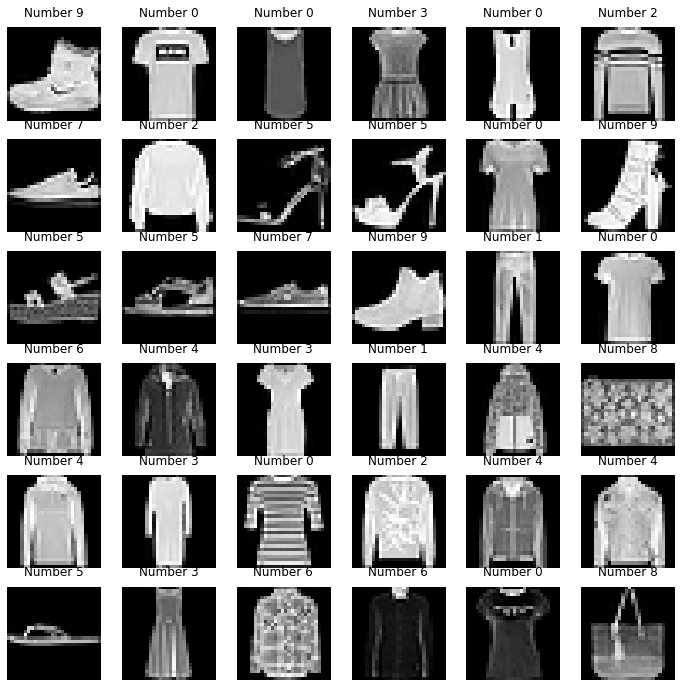

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
figure, axs = plt.subplots(6, 6, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
# display the figure
figure.show()

In [61]:
# convert each image to 1 dimensional array
X = train_x.reshape(len(x_train),-1)
Y = train_y

# normalize the data to 0 - 1
X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


In [62]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data
kmeans.fit(X)

10


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=10,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [63]:
kmeans.labels_

array([6, 3, 1, ..., 3, 1, 8])

In [64]:

def infer_cluster_labels(kmeans, actual_labels):

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        labels = []
        index = np.where(kmeans.labels_ == i)

        labels.append(actual_labels[index])

        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):

    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [65]:
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

[9 0 6 6 0 4 7 2 6 6 0 9 7 7 7 9 1 0 4 6]
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]


In [66]:
from sklearn import metrics

def calculate_metrics(estimator, data, labels):
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [67]:
clusters = [10, 16, 36, 64, 144, 256]

# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    calculate_metrics(estimator, X, Y)
    
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

Number of Clusters: 10
Inertia: 1931133.9103411986
Homogeneity: 0.5246835444015349
Accuracy: 0.6006

Number of Clusters: 16
Inertia: 1702302.3174389813
Homogeneity: 0.5695192149141575
Accuracy: 0.6192

Number of Clusters: 36
Inertia: 1552558.040710026
Homogeneity: 0.616824902081828
Accuracy: 0.6696

Number of Clusters: 64
Inertia: 1319054.2923310779
Homogeneity: 0.6784802330335453
Accuracy: 0.7181833333333333

Number of Clusters: 144
Inertia: 1176368.893314879
Homogeneity: 0.7164441494343384
Accuracy: 0.7505166666666667

Number of Clusters: 256
Inertia: 1087628.038069934
Homogeneity: 0.7405066240990568
Accuracy: 0.7738166666666667



In [68]:
# testing kmeans algorithm on testing dataset
X_test = test_x.reshape(len(test_x),-1)
X_test = X_test.astype(float) / 255.

kmeans = MiniBatchKMeans(n_clusters = 10)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)
    
print('Accuracy: {}\n'.format(metrics.accuracy_score(test_y, predicted_labels)))


Accuracy: 0.5198



C:\Users\Sonali\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


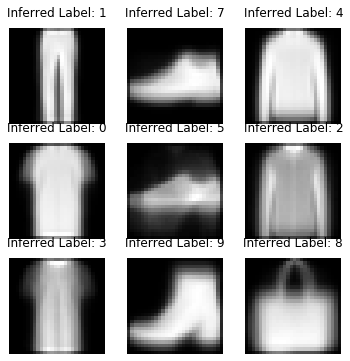

In [69]:
# Initialize and fit KMeans algorithm
kmeans = MiniBatchKMeans(n_clusters = 10)
kmeans.fit(X)

centroids = kmeans.cluster_centers_

images = centroids.reshape(10, 28, 28)
images *= 255
images = images.astype(np.uint8)

cluster_labels = infer_cluster_labels(kmeans, Y)

fig, axs = plt.subplots(3, 3, figsize = (6, 6))
plt.gray()

for i, ax in enumerate(axs.flat):
    
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
    ax.matshow(images[i])
    ax.axis('off')
    
fig.show()